# 5 Linear Systems

*Overview*

- [5.0 Introduction](#5.0-Introduction)
- [5.1 Definitions and Exmaples](#5.1 Definitions-and-Exmaples)
    - [Example 5.1.1](#Example-5.1.1)
    - [Stability Language](#Stability-Language)
- [5.2 Classification of Linear Systems](#5.2-Classification-of-Linear-Systems)

---

In [23]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

"""
$$\begin{align*}
& \quad\quad (5.)
\end{align*}$$
"""

'\n$$\x08egin{align*}\n& \\quad\\quad (5.)\n\\end{align*}$$\n'

## 5.0 Introduction
---

## 5.1 Definitions and Exmaples
---

**two-dimensional lilnear system**

$$\begin{align*}
\dot{x} &= ax + by \\
\dot{y} &= cx + dy
\end{align*}$$

$$\mathbf{\dot{x}} = \mathbf{Ax}$$

where

$$\begin{align*}
\mathbf{A} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\quad \text{and} \quad
\mathbf{x} = 
\begin{pmatrix}
x \\
y
\end{pmatrix}
\end{align*}$$

### Example 5.1.1

**simple harmonic oscillator**

$$\begin{align*}
m\ddot{x} + kx = 0
& \quad\quad (5.1.1)
\end{align*}$$

- $m$: mass
- $k$: spring constant
- $x$: displacement of the mass drom equilibrium


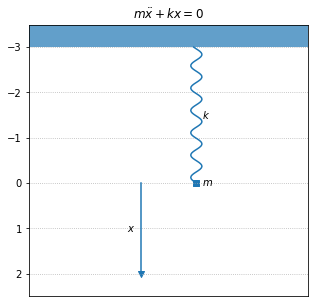

In [14]:
plt.figure(figsize=(5, 5))

# k
k = 3
plt.plot(np.sin(np.linspace(-k, 0, 100)*40/np.pi)*.1, np.linspace(-k, 0, 100), c=c[0], linestyle=l[0])
plt.text(0.1, -k/2, r'$k$', horizontalalignment='left', verticalalignment='center')

# m
plt.scatter(0, 0, c=c[0], marker=m[2])
plt.text(0.1, 0, r'$m$', horizontalalignment='left', verticalalignment='center')

# x
x = 2
plt.plot(np.array([-1, -1]), np.array([0, x]), c=c[0], linestyle=l[0])
plt.text(-1.1, x/2, r'$x$', horizontalalignment='right', verticalalignment='center')
plt.scatter(-1, x, c=c[0], marker='v')

plt.axhspan(-3.5, -3, facecolor=c[0], alpha=.7)

# plt.plot(np.array([0, -1.5]), np.array([0, 0]), c=c[0], linestyle=l[1])

plt.title(r'$m\ddot{x} + kx = 0$')
plt.xlim(-3, 2)
plt.ylim(2.5, -3.5)
plt.xticks([])
# plt.yticks([])
plt.grid(True, linestyle=l[3])

plt.show()

$$\begin{align*}
\dot{x} &= v
& \quad\quad (5.1.2a) \\
\dot{v} &= -\frac{k}{m} x
& \quad\quad (5.1.2b)
\end{align*}$$

(5.1.2a): def of velocity
(5.1.2b): (5.1.1) rewritten

Let $\omega^2 := \frac{k}{m}$

$$\begin{align*}
\dot{x} &= v 
& \quad\quad (5.1.3a) \\
\dot{v} &= -\omega^2 x
& \quad\quad (5.1.3b)
\end{align*}$$

$\begin{pmatrix}\dot{x}\\ \dot{v}\end{pmatrix} = \begin{pmatrix}v\\ -\omega^2x\end{pmatrix}$


$$\begin{align*}
& \quad\quad (5.)
\end{align*}$$

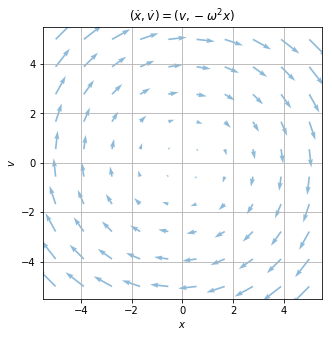

In [19]:
# constant
omega = 1

def x_dot(x, v):
    x_ = v
    return x_

def v_dot(x, v):
    v_ = - omega**2 * x
    return v_

x, v = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
x, v = np.meshgrid(x, v)

plt.figure(figsize=(5, 5))

plt.quiver(x, v, x_dot(x, v), v_dot(x, v), color=c[0], alpha=.5)

plt.grid(True)
plt.title(r'$(\dot{x}, \dot{v}) = (v, -\omega^2x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')

plt.show()

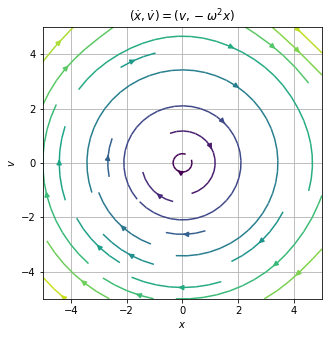

In [43]:
omega = 1

def x_dot(x, v):
    x_ = v
    return x_

def v_dot(x, v):
    v_ = - omega**2 * x
    return v_

x, v = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
x, v = np.meshgrid(x, v)

plt.figure(figsize=(5, 5))

plt.streamplot(x, v, x_dot(x,v), v_dot(x,v), 
               color=np.sqrt(x_dot(x, v)**2 + v_dot(x, v)**2), cmap='viridis',
               density=.5)

plt.title(r'$(\dot{x}, \dot{v}) = (v, -\omega^2x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.grid(True)

plt.show()

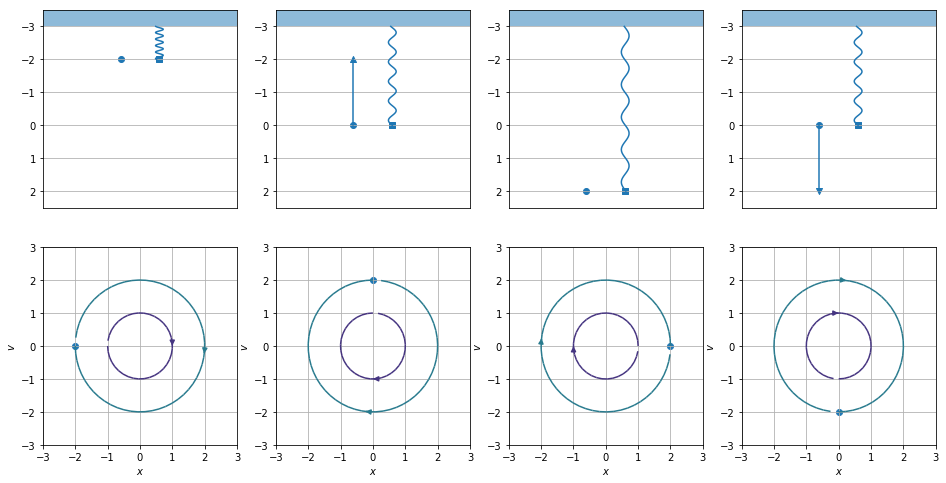

In [127]:
omega = 1
pi = np.pi

def x_dot(x, v):
    x_ = v
    return x_

def v_dot(x, v):
    v_ = - omega**2 * x
    return v_

def speed(x, v):
    s = np.sqrt(x_dot(x, v)**2 + v_dot(x, v)**2)
    return s

xs = np.array([-2, 0, 2, 0])
vs = np.array([0, 2, 0, -2])

x_stream, v_stream = np.linspace(-3, 3, 10), np.linspace(-3, 3, 10)
x_stream, v_stream = np.meshgrid(x_stream, v_stream)

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16, 8))

for i in range(4):
    x = xs[i]
    v = vs[i]
    
    axes[1, i].scatter(x, v, c=c[0], marker=m[0])
    #axes[1, i].plot(2*np.cos(np.linspace(-pi, pi, 100)), 2*np.sin(np.linspace(-pi, pi, 100)), c=c[0], linestyle=l[1], alpha=.5)
    axes[1, i].streamplot(x_stream, v_stream, x_dot(x_stream, v_stream), v_dot(x_stream, v_stream), 
                          color=speed(x_stream, v_stream), cmap='viridis',
                          start_points=np.array([[x, v], [x/2, v/2]]))
    
    axes[1, i].set_xlim(-3, 3)
    axes[1, i].set_ylim(-3, 3)
    axes[1, i].set(xlabel=r'$x$', ylabel=r'$v$')
    axes[1, i].set_xticks(np.arange(-3, 4, 1))
    axes[1, i].set_yticks(np.arange(-3, 4, 1))
    axes[1, i].grid(True)
    
    axes[0, i].plot(np.sin(np.linspace(-3, x, 100)*100/(x+3)/np.pi)*.1, np.linspace(-3, x, 100), c=c[0], linestyle=l[0])
    # m
    axes[0, i].scatter(0, x, c=c[0], marker=m[2])
    axes[0, i].plot(np.array([-1, -1]), np.array([x, x-v]), c=c[0], linestyle=l[0])
    axes[0, i].scatter(-1, x, c=c[0], marker='o')
    
    if v > 0:
        axes[0, i].scatter(-1, x-v, c=c[0], marker='^')
    elif v < 0:
        axes[0, i].scatter(-1, x-v, c=c[0], marker='v')
    
    axes[0, i].axhspan(-3.5, -3, facecolor=c[0], alpha=.5)
    axes[0, i].set_xlim(-3, 2)
    axes[0, i].set_ylim(2.5, -3.5)
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks(np.arange(-3, 3, 1))
    axes[0, i].grid(True)
    
plt.show()

### Example 5.1.2

Solve the linear system $\dot{\mathbf{x}} = \mathbf{Ax}$, 
where $\mathbf{A} = \begin{pmatrix} a & 0 \\ 0 & -1 \end{pmatrix}$

*Solution*:

$$\begin{pmatrix}
\dot{x} \\ 
\dot{y}
\end{pmatrix}
= 
\begin{pmatrix}
a & 0 \\
0 & -1
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}$$

$$\begin{align*}
x(t) &= x_0e^{at}
& \quad\quad (5.1.1a) \\
y(t) &= y_0e^{-t}
& \quad\quad (5.1.1b)
\end{align*}$$



$$\begin{align*}
& \quad\quad (5.1.)
\end{align*}$$

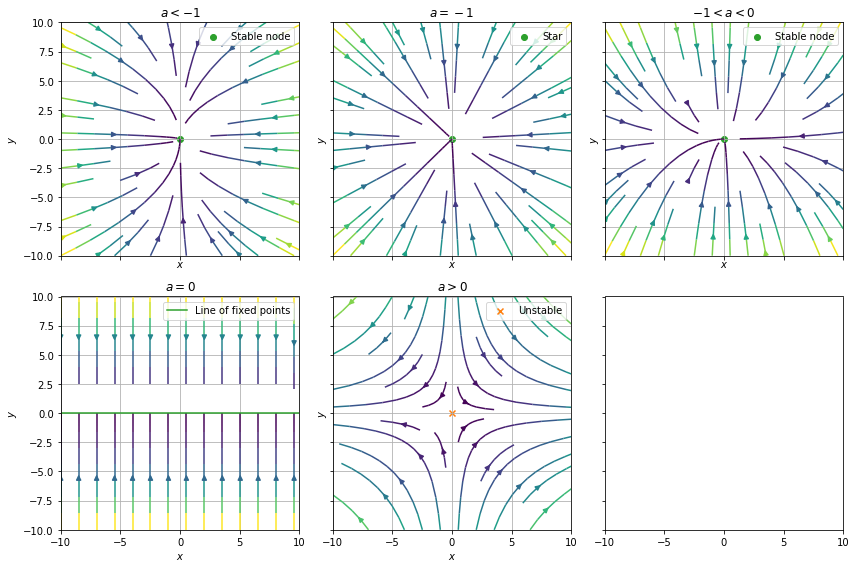

In [62]:
def x_dot(x, y, a):
    x_ = a*x
    return x_

def y_dot(x, y, a):
    y_ = - y
    return y_

# A = np.arange(-1.5, 1, .5)
A = np.array([-2, -1, -0.5, 0, 1])
# A = np.array([-3, -1, -1/3, 
#               -1/9, 0, 1/9, 
#               1/3, 1, 3])
# labels = np.array([r'$a = -3^{1}$', r'$a = -3^{0}$', r'$a = -3^{-1}$', 
#                    r'$a = -3^{-2}$', r'$a = 0$', r'$a = 3^{-2}$', 
#                    r'$a = 3^{-1}$', r'$a = 3^{0}$', r'$a = 3^{1}$'])
labels = np.array([r'$a<-1$', r'$a=-1$', r'$-1<a<0$', r'$a=0$', r'$a>0$'])

x, y = np.linspace(-10, 10, 20), np.linspace(-10, 10, 20)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(ncols=3, nrows=2, sharex=True, sharey=True, figsize=(12, 8))

for ax, a, label in zip(axes.ravel(), A, labels):
    ax.streamplot(x, y, x_dot(x, y, a), y_dot(x, y, a), 
                  density=.5,
                  color=x_dot(x, y, a)**2+y_dot(x, y, a)**2, cmap='viridis')# color=c[0])
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set(xlabel=r'$x$', ylabel=r'$y$', title=label)
    ax.grid(True)
    
    if (a < -1) | (-1 < a < 0):
        ax.scatter(0, 0, c=c[2], marker=m[0], label='Stable node')
    elif a == -1:
        ax.scatter(0, 0, c=c[2], marker=m[0], label='Star')
    elif a == 0:
        ax.plot(np.linspace(-10, 10, 5), np.repeat(0, 5), c=c[2], linestyle=l[0], label='Line of fixed points')
    elif a > 0:
        ax.scatter(0, 0, c=c[1], marker=m[1], label='Unstable')
    
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Stability Language

**Attracting** fixed point

**Globally attracting**

**Liapunov stable**

**Neutrally stable**

## 5.2 Classification of Linear Systems
---

$$\begin{align*}
\mathbf{X}(t) = e^{\lambda t} \mathbf{v}
& \quad\quad (5.2.2)
\end{align*}$$

- $\mathbf{x} \ne \mathbf{o}$: some fixed vector
- $\lambda$: grawth rate

substitute into $\mathbf{\dot{x}} = \mathbf{Ax}$

$\lambda e^{\lambda t} \mathbf{v} = e^{\lambda t} \mathbf{Av}$

$$\begin{align*}
\mathbf{Av} = \lambda \mathbf{v}
& \quad\quad (5.2.3)
\end{align*}$$

if $\mathbf{x}$ is **eigenvector**, **eigenvalue** $\lambda$

**eigensolution**

**characteristic eq**

$\det{(A-\lambda I)} = \mathbf{o}$

- $\mathbf{I}$: identity mat


$A = \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}$

$\det{\begin{pmatrix}
a - \lambda & b \\
c & d - \lambda
\end{pmatrix}
} = 0$

Expanding the determinant

$$\begin{align*}
\lambda^2 - \tau\lambda + \Delta = 0
& \quad\quad (5.2.4)
\end{align*}$$


where 
- $\tau = \text{trace}(A) = a + d$
- $\Delta = \det{(A)} = ad -bc$

then
$$\begin{align*}
\lambda_1 = \frac{\tau + \sqrt{\tau^2 - 4\Delta}}{2}, &\quad
\lambda_2 = \frac{\tau - \sqrt{\tau^2 - 4\Delta}}{2}
& \quad\quad (5.2.5)
\end{align*}$$

$\mathbf{x_0} = c_1 \mathbf{v_1} + c_2 \mathbf{v_2}$

$$\begin{align*}
\mathbf{x}(t) = c_1  e^{\lambda_1 t} \mathbf{v_1} + c_2  e^{\lambda_2 t} \mathbf{v_2}
& \quad\quad (5.2.6)
\end{align*}$$

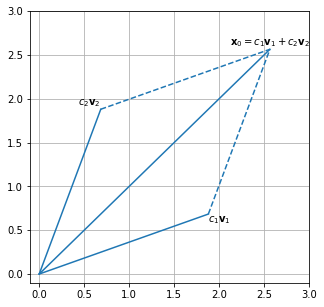

In [88]:
pi = np.pi

v_1 = np.array([np.cos(pi/9), np.sin(pi/9)])
v_2 = np.array([np.cos(pi/2 - pi/9), np.sin(pi/2 - pi/9)])

c_1 = 2
c_2 = 2

plt.figure(figsize=(5, 5))

plt.plot(np.array([0, c_1*v_1[0]]), np.array([0, c_1*v_1[1]]), c=c[0], linestyle=l[0])
plt.text(c_1*v_1[0], c_1*v_1[1], r'$c_1 \mathbf{v}_1$', horizontalalignment='left', verticalalignment='top')
plt.plot(np.array([0, c_2*v_2[0]]), np.array([0, c_2*v_2[1]]), c=c[0], linestyle=l[0])
plt.text(c_2*v_2[0], c_2*v_2[1], r'$c_2 \mathbf{v}_2$', horizontalalignment='right', verticalalignment='bottom')

plt.plot(np.array([c_1*v_1[0], c_1*v_1[0]+c_2*v_2[0]]), np.array([c_1*v_1[1], c_1*v_1[1]+c_2*v_2[1]]), c=c[0], linestyle=l[1])
plt.plot(np.array([c_2*v_2[0], c_1*v_1[0]+c_2*v_2[0]]), np.array([c_2*v_2[1], c_1*v_1[1]+c_2*v_2[1]]), c=c[0], linestyle=l[1])

plt.plot(np.array([0, c_1*v_1[0]+c_2*v_2[0]]), np.array([0, c_1*v_1[1]+c_2*v_2[1]]), c=c[0], linestyle=l[0])
plt.text(c_1*v_1[0]+c_2*v_2[0], c_1*v_1[1]+c_2*v_2[1], r'$\mathbf{x}_0 = c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2$', horizontalalignment='center', verticalalignment='bottom')

plt.xlim(-0.1, 3)
plt.ylim(-0.1, 3)
plt.grid(True)

plt.show()

### Example 5.2.1

Solve

$\begin{pmatrix}
\dot{x} \\
\dot{y}
\end{pmatrix} =
\begin{pmatrix}
1 & 1 \\
4 & -2
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}$


initial condition

$(x_0, y_0) = (2, -3)$

*Solution*:

$\tau = -1$, $\Delta = -6$

$\lambda^2 + \lambda - 6 = 0$

Hence 

$$\begin{align*}
\lambda_1 = 2, &\quad \lambda_2 = -3
\end{align*}$$

eigenvalue $\lambda$, eigenvector $\mathbf{v} = (v_1, v_2)$ satisfy

$$\begin{pmatrix}
1-\lambda & 1 \\
4 & -2 - \lambda
\end{pmatrix}
\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix} =
\begin{pmatrix}
0 \\
0
\end{pmatrix}$$

$\lambda_1 = 2$, yield 

$\begin{pmatrix}
-1 & 1 \\
4 & -4
\end{pmatrix}
\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix} =
\begin{pmatrix}
0 \\
0
\end{pmatrix}$


nontrivial solution:

$\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix}
= 
\begin{pmatrix}
1 \\
1
\end{pmatrix}$


$\lambda_2 = -3$, yield 

$\begin{pmatrix}
4 & 1 \\
4 & 1
\end{pmatrix}
\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0
\end{pmatrix}$

nontrivial solution:

$\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix}
= 
\begin{pmatrix}
1 \\
-4
\end{pmatrix}$


$$\begin{align*}
\mathbf{v}_1 = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
, & \quad
\mathbf{v}_2 = 
\begin{pmatrix}
1 \\
-4
\end{pmatrix}
\end{align*}$$

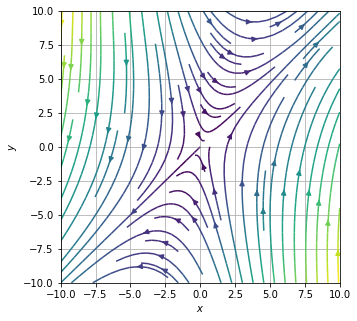

In [96]:
def x_dot(x, y):
    x_ = x + y
    return x_

def y_dot(x, y):
    y_ = 4*x - 2*y
    return y_

def speed(x, y):
    s = np.sqrt(x_dot(x, y)**2 + y_dot(x, y)**2)
    return s

x, y = np.linspace(-10, 10, 10), np.linspace(-10, 10, 10)
x, y = np.meshgrid(x, y)

plt.figure(figsize=(5, 5))

plt.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
               density=1, 
               color=speed(x, y), 
               cmap='viridis')

plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()

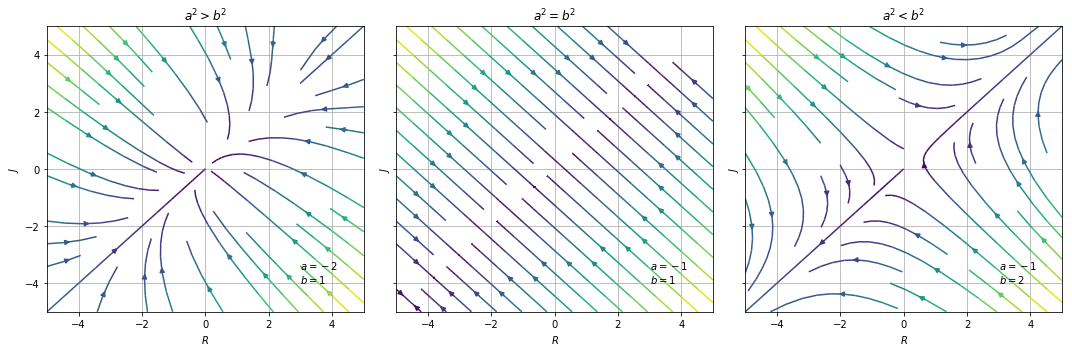

In [30]:
# a b
# c d

# a < 0
# b > 0
# c = b
# d = a


aa, bb = np.array([-2, -1, -1]), np.array([1, 1, 2])
# c = b
# d = a

def R_dot(R, J):
    R_ = a*R + b*J
    return R_

def J_dot(R, J):
    J_ = c*R + d*J
    return J_

def speed(R, J):
    s = R_dot(R, J)**2 + J_dot(R, J)**2
    s = np.sqrt(s)
    return s

R, J = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
R, J = np.meshgrid(R, J)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for ax, a, b in zip(axes, aa, bb):
    c = b
    d = a
    
#     start = np.array([[0, 0],
#                       [5, 5],
#                       [-5, 5],
#                       [-5, -5],
#                       [5, -5]])#,
#                       #[2.5, 2.5],
#                       #[-2.5, 2.5],
#                       #[-2.5, -2.5],
#                       #[2.5, -2.5]])
    
    ax.streamplot(R, J, R_dot(R, J), J_dot(R, J), 
                  density=.5, 
                  color=speed(R, J), cmap='viridis')#, 
                  #start_points=start)
    
    if a**2 > b**2:
        ax.set(xlabel=r'$R$', ylabel=r'$J$', title=r'$a^2>b^2$')
    elif a**2 == b**2:
        ax.set(xlabel=r'$R$', ylabel=r'$J$', title=r'$a^2=b^2$')
    elif a**2 < b**2:
        ax.set(xlabel=r'$R$', ylabel=r'$J$', title=r'$a^2<b^2$')
    
    ax.text(3, -4, (r'$a = %d$' '\n' r'$b = %d$' % (a, b)))
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid(True)
    
    
plt.tight_layout()
plt.show()

---
*Overview*

- [5.0 Introduction](#5.0-Introduction)
- [5.1 Definitions and Exmaples](#5.1 Definitions-and-Exmaples)
    - [Example 5.1.1](#Example-5.1.1)
    - [Stability Language](#Stability-Language)
- [5.2 Classification of Linear Systems](#5.2-Classification-of-Linear-Systems)